# PPO Experiment

### Defining configs and inputs

In [ ]:
from PPO.ppo_test import test_ppo_policy

target_model = "./trained-models/ppo/target-env-train/clip-range:0.11258122567530965/ppo_model.mdl"
source_model = "./trained-models/ppo/source-env-train/clip-range:0.219204216258128/ppo_model.mdl"

target_env = "CustomHopper-target-v0"
source_env = "CustomHopper-source-v0"

### Perform Tests

In [5]:
print("SOURCE->SOURCE TEST")
source_source_rewards, source_source_ep_len = test_ppo_policy(
    test_env=source_env, 
    model=source_model
)
mean_source_source_reward = sum(source_source_rewards)/len(source_source_rewards)
mean_source_source_ep_len = sum(source_source_ep_len)/len(source_source_ep_len)
print("Mean Reward source->source: ", mean_source_source_reward)
print("Mean ep lenght source->source: ", mean_source_source_ep_len)

print("SOURCE->TARGET TEST")
source_target_rewards, source_target_ep_len = test_ppo_policy(
    test_env=target_env,
    model=source_model
)
mean_source_target_reward = sum(source_target_rewards)/len(source_target_rewards)
mean_source_target_ep_len = sum(source_target_ep_len)/len(source_target_ep_len)
print("Mean Reward source->target: ", mean_source_target_reward)
print("Mean ep lenght source->target: ", mean_source_target_ep_len)

print("TARGET->TARGET TEST")
target_target_rewards, target_target_ep_len = test_ppo_policy(
    test_env=target_env,
    model=target_model
)
mean_target_target_reward = sum(target_target_rewards)/len(target_target_rewards)
mean_target_target_ep_len = sum(target_target_ep_len)/len(target_target_ep_len)
print("Mean Reward target->target: ", mean_target_target_reward)
print("Mean ep lenght target->target: ", mean_target_target_ep_len)



SOURCE->SOURCE TEST
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [2.47400421 3.92699082 2.71433605 5.0893801 ]
Mean Reward source->source:  939.380444509437
Mean ep lenght source->source:  259.89
SOURCE->TARGET TEST
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [3.53429174 3.92699082 2.71433605 5.0893801 ]
Mean Reward source->target:  438.72462476762996
Mean ep lenght source->target:  149.569
TARGET->TARGET TEST
Action space: Box([-1. -1. -1.], [1. 1. 1.], (3,), float32)
State space: Box([-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf inf inf inf], (11,), float64)
Dynamics parameters: [3.53429174 3.9269

### Plot rewards

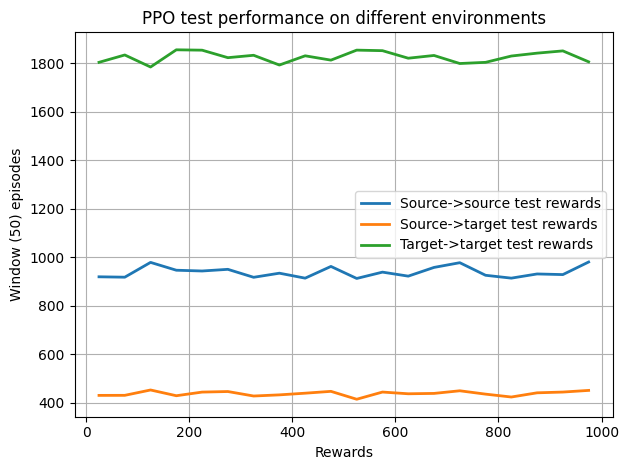

In [6]:
import matplotlib.pyplot as plt
import numpy as np

window_size = 50

def calculate_windows(data):
    means = []
    positions = []
    for i in range(0, len(data), window_size):
        window = data[i:i+window_size]
        mean_value = np.mean(window)
        means.append(mean_value)
        positions.append(i + window_size//2)
    return positions, means
    
source_source_p, source_source_m = calculate_windows(source_source_rewards)
source_target_p, source_target_m = calculate_windows(source_target_rewards)
target_target_p, target_target_m = calculate_windows(target_target_rewards)

plt.plot(source_source_p, source_source_m, label=f'Source->source test rewards', linewidth=2)
plt.plot(source_target_p, source_target_m, label=f'Source->target test rewards', linewidth=2)
plt.plot(target_target_p, target_target_m, label=f'Target->target test rewards', linewidth=2)

plt.xlabel("Rewards")
plt.ylabel(f"Window ({window_size}) episodes")
plt.title("PPO test performance on different environments")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()